In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go



In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
%matplotlib inline

In [6]:
# Initialize Plotly for use in the notebook
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [7]:
# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

In [8]:
df = pd.read_excel("C:/Users/91738/Downloads/DS_Python_Assignment.xlsx")

In [78]:
df

,CUSTOMERID,STATE,LCPCOUNT,PRIVATELABELTENDERFLAG,TENURE_IN_MONTHS,CLOSESTSTOREDISTANCE,FEMALE,AGE,HS_DIPLOMA,SOME_COLLEGE,...,MDAYREV_L3Y,MDAYREV_L4Y,MDAYQTY_L1Y,MDAYQTY_L2Y,MDAYQTY_L3Y,MDAYQTY_L4Y,MDAYSHOPPER_L1Y,MDAYSHOPPER_L2Y,MDAYSHOPPER_L3Y,MDAYSHOPPER_L4Y
0,5001,TX,1,N,-9.0,NaN,0,NaN,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,5002,OH,0,Y,9.0,8.728943,0,NaN,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,5003,TX,0,N,12.0,NaN,0,NaN,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,5004,TN,0,N,-1.0,NaN,0,NaN,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0
4,5005,TX,0,N,16.0,NaN,0,NaN,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,14996,PA,1,Y,139.0,37.827206,1,41.0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0
9996,14997,PA,1,N,28.0,40.064053,0,49.0,0,1,...,0.0,0.0,0,0,0,0,0,0,0,0
9997,14998,DC,2,N,10.0,2.280174,0,NaN,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0
9998,14999,CO,1,N,23.0,6.926766,0,NaN,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 117 entries, CUSTOMERID to MDAYSHOPPER_L4Y
dtypes: float64(49), int64(65), object(3)
memory usage: 8.9+ MB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CUSTOMERID,10000.0,10000.500000,2886.895680,5001.0,7500.750000,10000.500000,12500.25000,15000.000000
LCPCOUNT,10000.0,1.171900,2.067118,0.0,0.000000,1.000000,1.00000,75.000000
TENURE_IN_MONTHS,9934.0,54.286290,70.087569,-9.0,10.000000,28.000000,62.00000,287.000000
CLOSESTSTOREDISTANCE,8455.0,21.126264,83.097443,0.0,4.643872,8.442909,17.79359,4763.484736
FEMALE,10000.0,0.156700,0.363536,0.0,0.000000,0.000000,0.00000,1.000000
...,...,...,...,...,...,...,...,...
MDAYQTY_L4Y,10000.0,0.023100,0.197409,0.0,0.000000,0.000000,0.00000,5.000000
MDAYSHOPPER_L1Y,10000.0,0.022900,0.149592,0.0,0.000000,0.000000,0.00000,1.000000
MDAYSHOPPER_L2Y,10000.0,0.000600,0.024489,0.0,0.000000,0.000000,0.00000,1.000000
MDAYSHOPPER_L3Y,10000.0,0.020500,0.141710,0.0,0.000000,0.000000,0.00000,1.000000


In [18]:
missing_values_count = df.isnull().sum()

# Filter for columns with missing values
missing_values_with_counts = missing_values_count[missing_values_count > 0]

print("Columns with missing values and their counts:")
print(missing_values_with_counts)

Columns with missing values and their counts:
STATE                                                   59
TENURE_IN_MONTHS                                        66
CLOSESTSTOREDISTANCE                                  1545
AGE                                                   5945
INCOME                                                3259
LENGTH OF RESIDENCE                                   2872
NUMBER OF PERSONS IN LIVING UNIT                      2872
NUMBER OF ADULTS IN LIVING UNIT                       2872
MOSAIC                                                1868
CAPE: AGE: POP: MEDIAN AGE                            2872
CAPE: AGE: POP: % 0-17                                2872
CAPE: AGE: POP: % 18-99+                              2872
CAPE: AGE: POP: % 65-99+                              2872
CAPE: ETHNIC: POP: % WHITE ONLY                       2872
CAPE: ETHNIC: POP: % BLACK ONLY                       2872
CAPE: ETHNIC: POP: % ASIAN ONLY                       2872
CAPE: ETHN

2)   Categotize the columns based upon their data type and print, for ex: print all the numeric variables and other data types as well


In [70]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

object_cols = df.select_dtypes(include=['object']).columns.tolist()

boolean_like_cols = [col for col in numeric_cols if set(df[col].unique()).issubset({0, 1})]


# Remove boolean-like columns from numeric_cols
numeric_cols = [col for col in numeric_cols if col not in boolean_like_cols]

# Print categorized columns
print("Boolean-like Columns:", boolean_like_cols)
print("\nNumber of Boolean columns ",len(boolean_like_cols) )
print( )
print("Numeric Columns:", numeric_cols)
print("\nNumber of Numeric columns ",len(numeric_cols) )
print( )
print("Object Columns:", object_cols)
print("\nNumber of Object columns ",len(object_cols) )

Boolean-like Columns: ['FEMALE', 'HS_DIPLOMA', 'SOME_COLLEGE', 'BACH_GRAD_DEG', 'LT_HS_DIPLOMA', 'MARRIED', 'MNGMNT_OFFICEADMIN', 'TECH_PROF', 'SALES_JOB', 'BLUE_COLLAR', 'FARMER', 'RETIRED', 'SFDU', 'MFDU', 'HOMEOWNER', 'MAIL_RESP_MULTI', 'MAIL_RESP_SINGLE', 'METRO', 'URBAN', 'MOR BANK: RELIGIOUS MAGAZINE', 'MOR BANK: PHOTOGRAPHY', 'CHILDREN', '7-Cost Only Spend', 'MDAYSHOPPER_L1Y', 'MDAYSHOPPER_L2Y', 'MDAYSHOPPER_L3Y', 'MDAYSHOPPER_L4Y']

Number of Boolean columns  27

Numeric Columns: ['CUSTOMERID', 'LCPCOUNT', 'TENURE_IN_MONTHS', 'CLOSESTSTOREDISTANCE', 'AGE', 'INCOME', 'LENGTH OF RESIDENCE', 'NUMBER OF PERSONS IN LIVING UNIT', 'NUMBER OF ADULTS IN LIVING UNIT', 'MOR BANK: UPSCALE MERCHANDISE BUYER', 'MOR BANK: MALE MERCHANDISE BUYER', 'MOR BANK: FEMALE MERCHANDISE BUYER', 'MOR BANK: CRAFTS-HOBBY MERCHANDISE BUYER', 'MOR BANK: GARDENING-FARMING BUYER', 'MOR BANK: BOOK BUYER', 'MOR BANK: COLLECT-SPECIAL FOODS BUYER', 'MOR BANK: GIFTS AND GADGETS BUYER', 'MOR BANK: GENERAL MERCHANDIS

In [71]:
# Get all columns in the dataset
all_columns = set(df.columns)

# Combine categorized columns
categorized_columns = set(boolean_like_cols + numeric_cols + object_cols)

# Find the missing column(s)
missing_columns = all_columns - categorized_columns

print("Missing Column(s):", missing_columns)


Missing Column(s): {'PRIVATELABELTENDERFLAG'}


In [64]:
unique_elements = df['PRIVATELABELTENDERFLAG'].unique()
print(unique_elements)

['N' 'Y']


In [83]:
print(df['PRIVATELABELTENDERFLAG'].dtype)

df['privatelabel_backup'] = df['PRIVATELABELTENDERFLAG']
print("back-up created for privatetenderflag column")

object
back-up created for privatetenderflag column


In [85]:
df['PRIVATELABELTENDERFLAG'] = df['PRIVATELABELTENDERFLAG'].str.strip()  # Remove leading/trailing whitespaces
df['PRIVATELABELTENDERFLAG'] = df['PRIVATELABELTENDERFLAG'].map({'Y': 1, 'N': 0})

# Check the updated column
print(df['PRIVATELABELTENDERFLAG'].head())


0    0
1    1
2    0
3    0
4    0
Name: PRIVATELABELTENDERFLAG, dtype: int64


In [87]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

object_cols = df.select_dtypes(include=['object']).columns.tolist()

boolean_like_cols = [col for col in numeric_cols if set(df[col].unique()).issubset({0, 1})]


# Remove boolean-like columns from numeric_cols
numeric_cols = [col for col in numeric_cols if col not in boolean_like_cols]

# Print categorized columns
print("Boolean-like Columns:", boolean_like_cols)
print("\nNumber of Boolean columns ",len(boolean_like_cols) )
print( )
print("Numeric Columns:", numeric_cols)
print("\nNumber of Numeric columns ",len(numeric_cols) )
print( )
print("Object Columns:", object_cols)
print("\nNumber of Object columns ",len(object_cols) )

Boolean-like Columns: ['PRIVATELABELTENDERFLAG', 'FEMALE', 'HS_DIPLOMA', 'SOME_COLLEGE', 'BACH_GRAD_DEG', 'LT_HS_DIPLOMA', 'MARRIED', 'MNGMNT_OFFICEADMIN', 'TECH_PROF', 'SALES_JOB', 'BLUE_COLLAR', 'FARMER', 'RETIRED', 'SFDU', 'MFDU', 'HOMEOWNER', 'MAIL_RESP_MULTI', 'MAIL_RESP_SINGLE', 'METRO', 'URBAN', 'MOR BANK: RELIGIOUS MAGAZINE', 'MOR BANK: PHOTOGRAPHY', 'CHILDREN', '7-Cost Only Spend', 'MDAYSHOPPER_L1Y', 'MDAYSHOPPER_L2Y', 'MDAYSHOPPER_L3Y', 'MDAYSHOPPER_L4Y']

Number of Boolean columns  28

Numeric Columns: ['CUSTOMERID', 'LCPCOUNT', 'TENURE_IN_MONTHS', 'CLOSESTSTOREDISTANCE', 'AGE', 'INCOME', 'LENGTH OF RESIDENCE', 'NUMBER OF PERSONS IN LIVING UNIT', 'NUMBER OF ADULTS IN LIVING UNIT', 'MOR BANK: UPSCALE MERCHANDISE BUYER', 'MOR BANK: MALE MERCHANDISE BUYER', 'MOR BANK: FEMALE MERCHANDISE BUYER', 'MOR BANK: CRAFTS-HOBBY MERCHANDISE BUYER', 'MOR BANK: GARDENING-FARMING BUYER', 'MOR BANK: BOOK BUYER', 'MOR BANK: COLLECT-SPECIAL FOODS BUYER', 'MOR BANK: GIFTS AND GADGETS BUYER', 'MO

In [88]:
df = df.drop(columns=['privatelabel_backup'])

In [89]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

object_cols = df.select_dtypes(include=['object']).columns.tolist()

boolean_like_cols = [col for col in numeric_cols if set(df[col].unique()).issubset({0, 1})]


# Remove boolean-like columns from numeric_cols
numeric_cols = [col for col in numeric_cols if col not in boolean_like_cols]

# Print categorized columns
print("Boolean-like Columns:", boolean_like_cols)
print("\nNumber of Boolean columns ",len(boolean_like_cols) )
print( )
print("Numeric Columns:", numeric_cols)
print("\nNumber of Numeric columns ",len(numeric_cols) )
print( )
print("Object Columns:", object_cols)
print("\nNumber of Object columns ",len(object_cols) )

Boolean-like Columns: ['PRIVATELABELTENDERFLAG', 'FEMALE', 'HS_DIPLOMA', 'SOME_COLLEGE', 'BACH_GRAD_DEG', 'LT_HS_DIPLOMA', 'MARRIED', 'MNGMNT_OFFICEADMIN', 'TECH_PROF', 'SALES_JOB', 'BLUE_COLLAR', 'FARMER', 'RETIRED', 'SFDU', 'MFDU', 'HOMEOWNER', 'MAIL_RESP_MULTI', 'MAIL_RESP_SINGLE', 'METRO', 'URBAN', 'MOR BANK: RELIGIOUS MAGAZINE', 'MOR BANK: PHOTOGRAPHY', 'CHILDREN', '7-Cost Only Spend', 'MDAYSHOPPER_L1Y', 'MDAYSHOPPER_L2Y', 'MDAYSHOPPER_L3Y', 'MDAYSHOPPER_L4Y']

Number of Boolean columns  28

Numeric Columns: ['CUSTOMERID', 'LCPCOUNT', 'TENURE_IN_MONTHS', 'CLOSESTSTOREDISTANCE', 'AGE', 'INCOME', 'LENGTH OF RESIDENCE', 'NUMBER OF PERSONS IN LIVING UNIT', 'NUMBER OF ADULTS IN LIVING UNIT', 'MOR BANK: UPSCALE MERCHANDISE BUYER', 'MOR BANK: MALE MERCHANDISE BUYER', 'MOR BANK: FEMALE MERCHANDISE BUYER', 'MOR BANK: CRAFTS-HOBBY MERCHANDISE BUYER', 'MOR BANK: GARDENING-FARMING BUYER', 'MOR BANK: BOOK BUYER', 'MOR BANK: COLLECT-SPECIAL FOODS BUYER', 'MOR BANK: GIFTS AND GADGETS BUYER', 'MO

In [60]:
#DELETE
print("\nBoolean Columns:")
print(df.select_dtypes(include=['bool']).columns.tolist())


Boolean Columns:
[]


In [24]:
#DELETE
print("\nObject Columns:")
print(df.select_dtypes(include=['object']).columns.tolist())


Object Columns:
['STATE', 'PRIVATELABELTENDERFLAG', 'MOSAIC']


In [28]:
#DELETE
print("\nNumeric Columns:")
print(df.select_dtypes(include=['number']).columns.tolist())


Numeric Columns:
['CUSTOMERID', 'LCPCOUNT', 'TENURE_IN_MONTHS', 'CLOSESTSTOREDISTANCE', 'FEMALE', 'AGE', 'HS_DIPLOMA', 'SOME_COLLEGE', 'BACH_GRAD_DEG', 'LT_HS_DIPLOMA', 'MARRIED', 'MNGMNT_OFFICEADMIN', 'TECH_PROF', 'SALES_JOB', 'BLUE_COLLAR', 'FARMER', 'RETIRED', 'SFDU', 'MFDU', 'HOMEOWNER', 'INCOME', 'MAIL_RESP_MULTI', 'MAIL_RESP_SINGLE', 'LENGTH OF RESIDENCE', 'NUMBER OF PERSONS IN LIVING UNIT', 'NUMBER OF ADULTS IN LIVING UNIT', 'METRO', 'URBAN', 'MOR BANK: UPSCALE MERCHANDISE BUYER', 'MOR BANK: MALE MERCHANDISE BUYER', 'MOR BANK: FEMALE MERCHANDISE BUYER', 'MOR BANK: CRAFTS-HOBBY MERCHANDISE BUYER', 'MOR BANK: GARDENING-FARMING BUYER', 'MOR BANK: BOOK BUYER', 'MOR BANK: COLLECT-SPECIAL FOODS BUYER', 'MOR BANK: GIFTS AND GADGETS BUYER', 'MOR BANK: GENERAL MERCHANDISE BUYER', 'MOR BANK: FAMILY AND GENERAL MAGAZINE', 'MOR BANK: FEMALE ORIENTED MAGAZINE', 'MOR BANK: MALE SPORTS MAGAZINE', 'MOR BANK: RELIGIOUS MAGAZINE', 'MOR BANK: GARDENING-FARMING MAGAZINE', 'MOR BANK: CULINARY INTER

In [27]:
#DELETE
print("Int columns")
print(df.select_dtypes(include=['int64']).columns.tolist())

Int columns
['CUSTOMERID', 'LCPCOUNT', 'FEMALE', 'HS_DIPLOMA', 'SOME_COLLEGE', 'BACH_GRAD_DEG', 'LT_HS_DIPLOMA', 'MARRIED', 'MNGMNT_OFFICEADMIN', 'TECH_PROF', 'SALES_JOB', 'BLUE_COLLAR', 'FARMER', 'RETIRED', 'SFDU', 'MFDU', 'HOMEOWNER', 'MAIL_RESP_MULTI', 'MAIL_RESP_SINGLE', 'METRO', 'URBAN', 'MOR BANK: UPSCALE MERCHANDISE BUYER', 'MOR BANK: MALE MERCHANDISE BUYER', 'MOR BANK: FEMALE MERCHANDISE BUYER', 'MOR BANK: CRAFTS-HOBBY MERCHANDISE BUYER', 'MOR BANK: GARDENING-FARMING BUYER', 'MOR BANK: BOOK BUYER', 'MOR BANK: COLLECT-SPECIAL FOODS BUYER', 'MOR BANK: GIFTS AND GADGETS BUYER', 'MOR BANK: GENERAL MERCHANDISE BUYER', 'MOR BANK: FAMILY AND GENERAL MAGAZINE', 'MOR BANK: FEMALE ORIENTED MAGAZINE', 'MOR BANK: MALE SPORTS MAGAZINE', 'MOR BANK: RELIGIOUS MAGAZINE', 'MOR BANK: GARDENING-FARMING MAGAZINE', 'MOR BANK: CULINARY INTERESTS MAGAZINE', 'MOR BANK: HEALTH AND FITNESS MAGAZINE', 'MOR BANK: DO-IT-YOURSELFERS', 'MOR BANK: NEWS AND FINANCIAL', 'MOR BANK: PHOTOGRAPHY', 'MOR BANK: OPPOR

In [29]:
#DELETE
print("Float Columns:")
print(df.select_dtypes(include=['float64']).columns.tolist())

Float Columns:
['TENURE_IN_MONTHS', 'CLOSESTSTOREDISTANCE', 'AGE', 'INCOME', 'LENGTH OF RESIDENCE', 'NUMBER OF PERSONS IN LIVING UNIT', 'NUMBER OF ADULTS IN LIVING UNIT', 'CAPE: AGE: POP: MEDIAN AGE', 'CAPE: AGE: POP: % 0-17', 'CAPE: AGE: POP: % 18-99+', 'CAPE: AGE: POP: % 65-99+', 'CAPE: ETHNIC: POP: % WHITE ONLY', 'CAPE: ETHNIC: POP: % BLACK ONLY', 'CAPE: ETHNIC: POP: % ASIAN ONLY', 'CAPE: ETHNIC: POP: % HISPANIC', 'CAPE: DENSITY: PERSONS PER HH FOR POP IN HH', 'CAPE: HHSIZE: HH: AVERAGE HOUSEHOLD SIZE', 'CAPE: TYP: HH: % MARRIED COUPLE FAMILY', 'CAPE: CHILD: HH: % WITH PERSONS LT18', 'CAPE: CHILD: HH: % MARR COUPLE FAMW- PERSONS LT18', 'CAPE: CHILD: HH: % MARR COUPLE FAMW-O PERSONS LT18', 'CAPE: LANG: HH: % SPANISH SPEAKING', 'CAPE: EDUC: POP25+: MEDIAN EDUCATION ATTAINED', 'CAPE: HOMVAL: OOHU: MEDIAN HOME VALUE', 'CAPE: BUILT: HU: MEDIAN HOUSING UNIT AGE', 'CAPE: TENANCY: OCCHU: % OWNER OCCUPIED', 'CAPE: TENANCY: OCCHU: % RENTER OCCUPIED', 'CAPE: EDUC: ISPSA', 'CAPE: EDUC: ISPSA DE

In [33]:
#DELETE
int_columns = len(df.select_dtypes(include=['int64']).columns)
float_columns = len(df.select_dtypes(include=['float64']).columns)
object_columns = len(df.select_dtypes(include=['object']).columns)
num_columns = len(df.select_dtypes(include=['number']).columns)

# Print the counts
print(f"Number of int64 columns: {int_columns}")
print(f"Number of float64 columns: {float_columns}")
print(f"Number of object columns: {object_columns}")
print(f"Number of number columsn(includes both float and int): {num_columns}")

Number of int64 columns: 65
Number of float64 columns: 49
Number of object columns: 3
Number of number columsn(includes both float and int): 114


3)   List the columns with duplicates a) Remove them b) Print before and after

In [90]:
print("Before removing duplicate columns:")
print(df)

# Identify duplicate columns
duplicates = df.columns[df.T.duplicated(keep='first')]

# Remove duplicate columns
df_cleaned = df.drop(columns=duplicates)

# Print duplicate columns
print("\nDuplicate columns:")
print(list(duplicates))

# Print the DataFrame after
print("\nAfter removing duplicate columns:")
print(df_cleaned)

Before removing duplicate columns:
      CUSTOMERID STATE  LCPCOUNT  PRIVATELABELTENDERFLAG  TENURE_IN_MONTHS  \
0           5001    TX         1                       0              -9.0   
1           5002    OH         0                       1               9.0   
2           5003    TX         0                       0              12.0   
3           5004    TN         0                       0              -1.0   
4           5005    TX         0                       0              16.0   
...          ...   ...       ...                     ...               ...   
9995       14996    PA         1                       1             139.0   
9996       14997    PA         1                       0              28.0   
9997       14998    DC         2                       0              10.0   
9998       14999    CO         1                       0              23.0   
9999       15000    TX         1                       0             229.0   

      CLOSESTSTOREDISTANCE  

4)  List the constant columns a) Remove them b) Print before and after

In [91]:
# Identify constant columns
constant_columns = [col for col in df.columns if df[col].nunique() == 1]

# Display constant columns
print("Constant columns:", constant_columns)

Constant columns: ['MARRIED', 'CHILDREN', '7-Cost Only Spend']


In [53]:
print("Before removing constant columns")
print(df)

Before removing constant columns
      CUSTOMERID STATE  LCPCOUNT PRIVATELABELTENDERFLAG  TENURE_IN_MONTHS  \
0           5001    TX         1                      N              -9.0   
1           5002    OH         0                      Y               9.0   
2           5003    TX         0                      N              12.0   
3           5004    TN         0                      N              -1.0   
4           5005    TX         0                      N              16.0   
...          ...   ...       ...                    ...               ...   
9995       14996    PA         1                      Y             139.0   
9996       14997    PA         1                      N              28.0   
9997       14998    DC         2                      N              10.0   
9998       14999    CO         1                      N              23.0   
9999       15000    TX         1                      N             229.0   

      CLOSESTSTOREDISTANCE  FEMALE   AGE  

In [54]:
print("After removing constant columns")
# Drop constant columns
df_cleaned = df.drop(columns=constant_columns)

# Display the cleaned DataFrame
print(df_cleaned)

After removing constant columns
      CUSTOMERID STATE  LCPCOUNT PRIVATELABELTENDERFLAG  TENURE_IN_MONTHS  \
0           5001    TX         1                      N              -9.0   
1           5002    OH         0                      Y               9.0   
2           5003    TX         0                      N              12.0   
3           5004    TN         0                      N              -1.0   
4           5005    TX         0                      N              16.0   
...          ...   ...       ...                    ...               ...   
9995       14996    PA         1                      Y             139.0   
9996       14997    PA         1                      N              28.0   
9997       14998    DC         2                      N              10.0   
9998       14999    CO         1                      N              23.0   
9999       15000    TX         1                      N             229.0   

      CLOSESTSTOREDISTANCE  FEMALE   AGE  H

5) Create box plot to visualise the outliers of all the numeric columns


In [64]:
print("\nNumber of Numeric columns ",len(numeric_cols) )


Number of Numeric columns  114


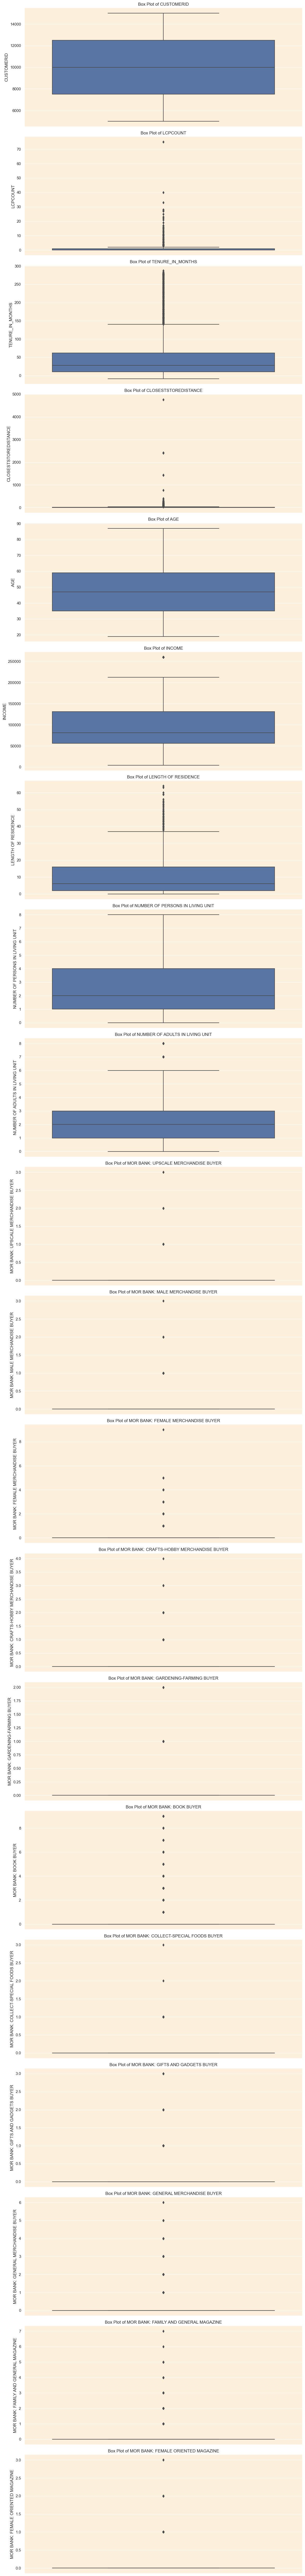

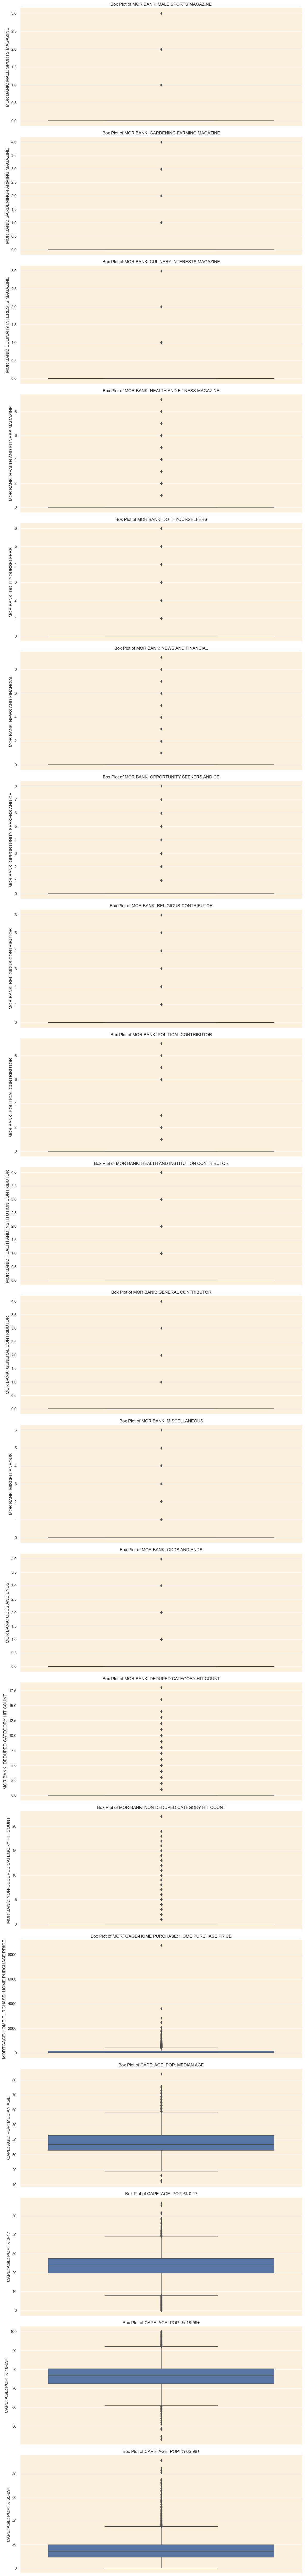

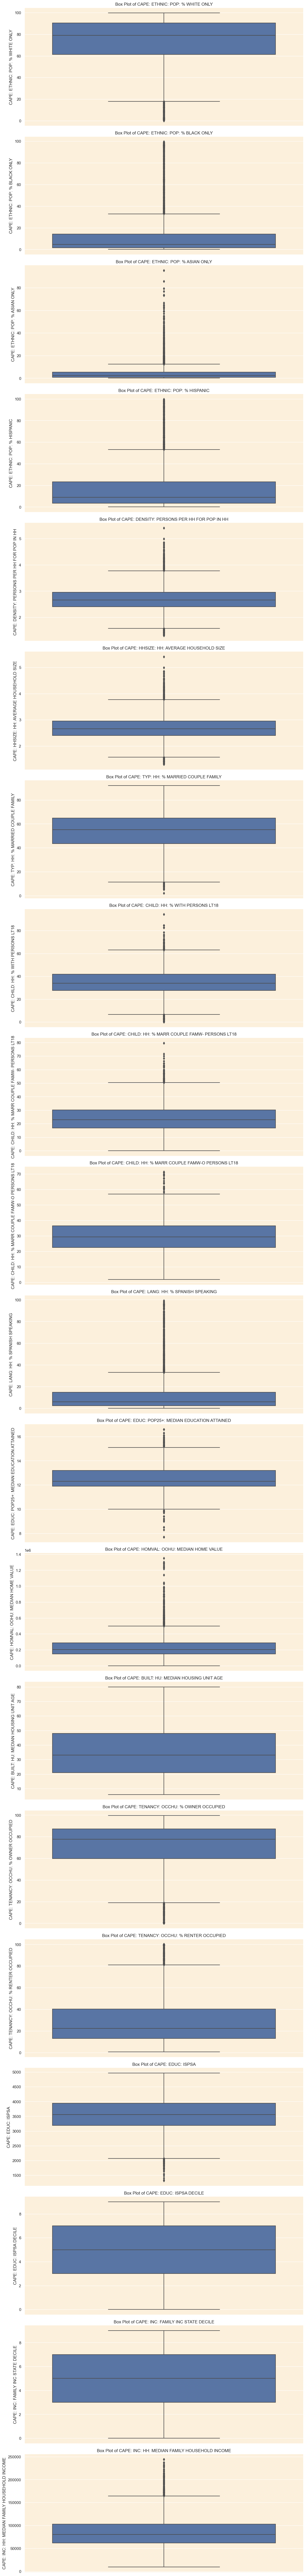

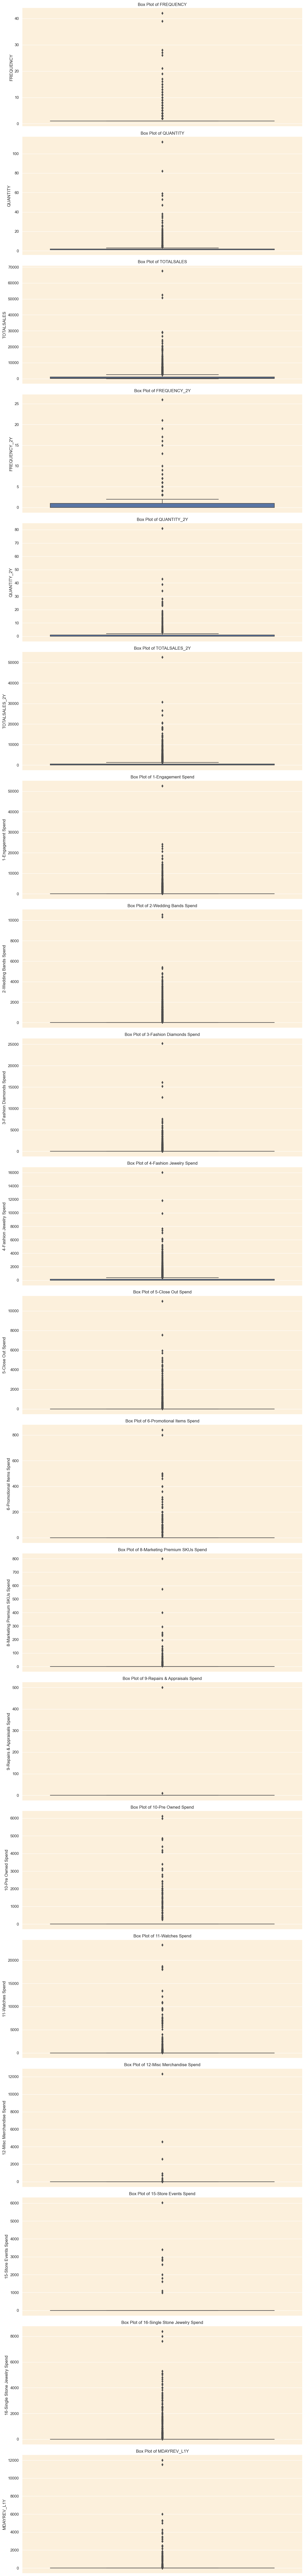

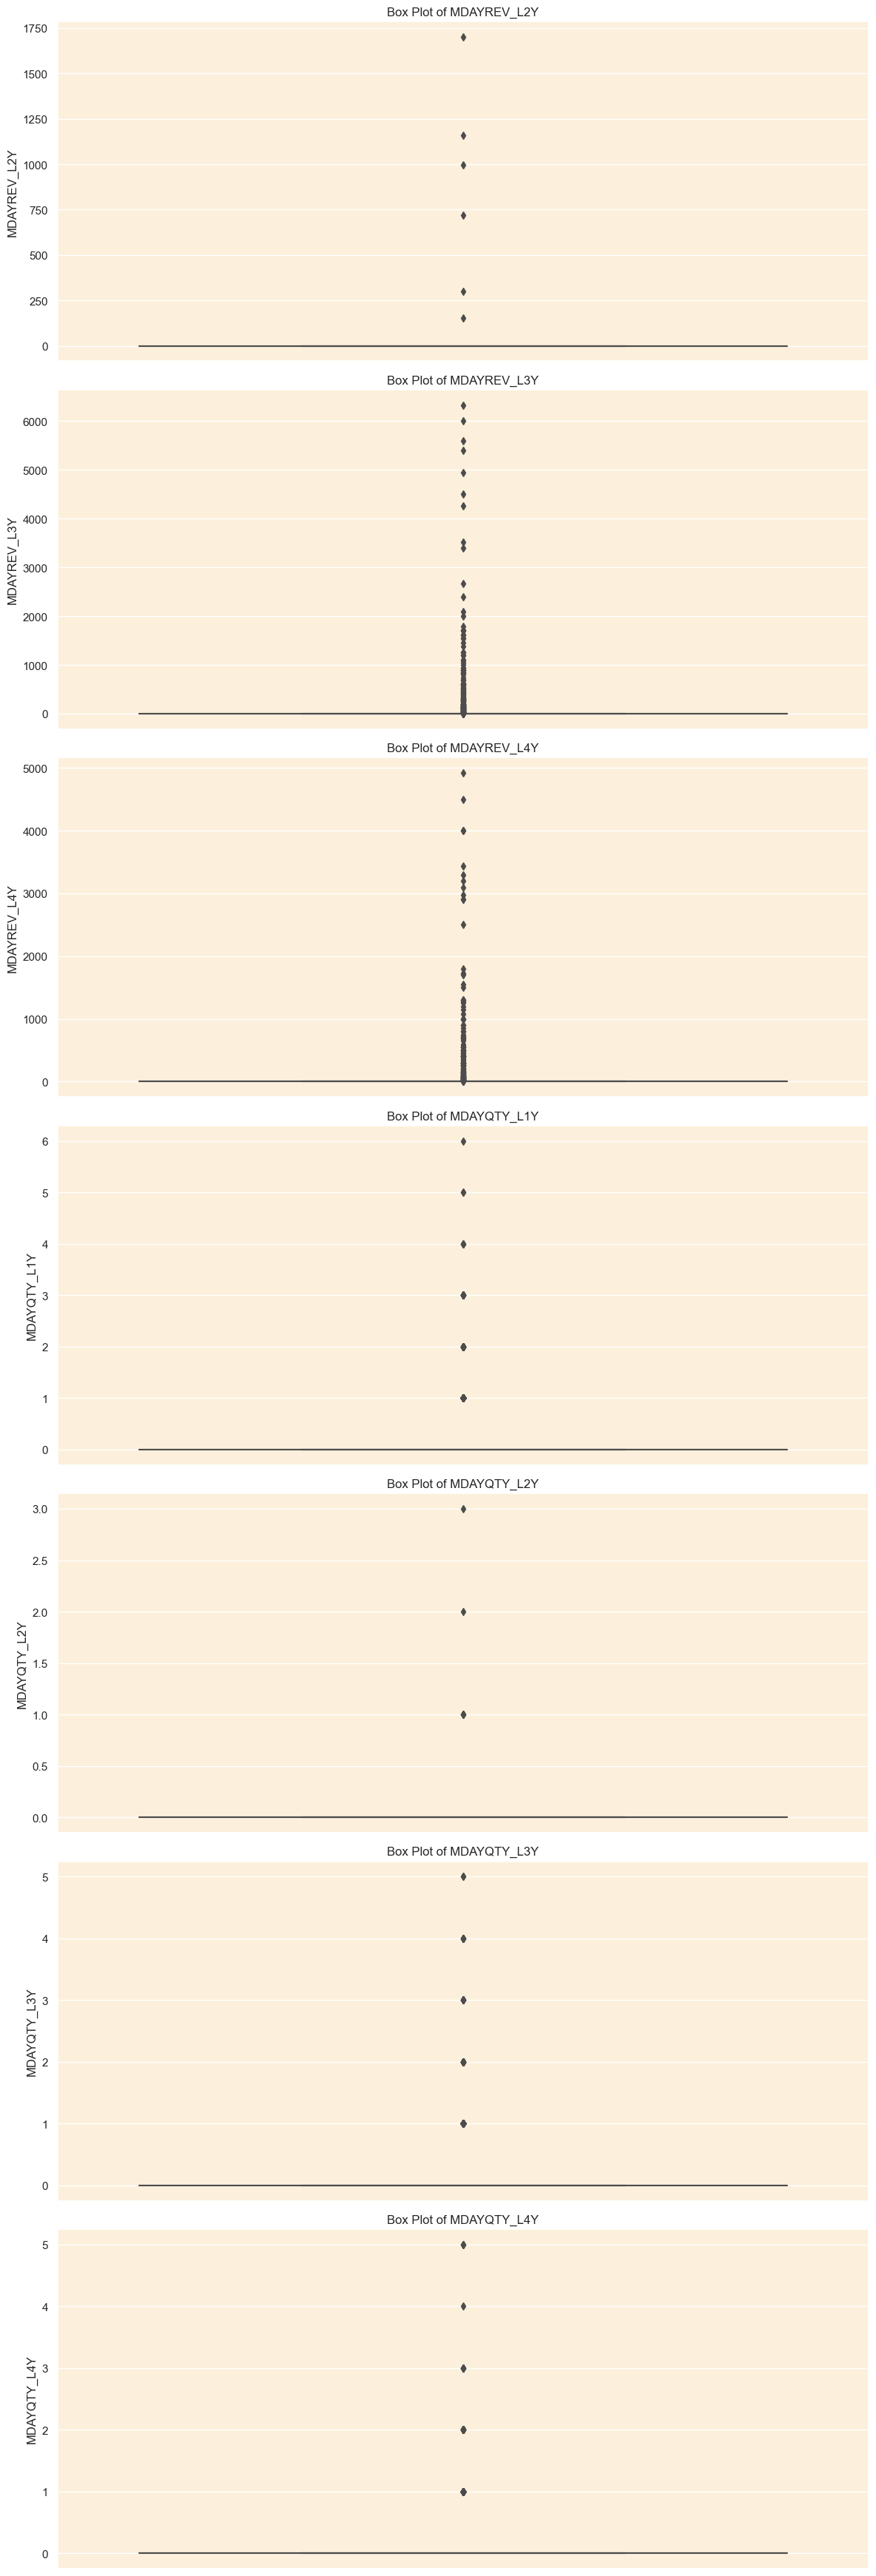

In [93]:
#numeric_columns = df.select_dtypes(include=['number']).columns

# Number of columns per figure
columns_per_figure = 20

# Split into batches and plot each batch
for i in range(0, len(numeric_cols), columns_per_figure):
    batch = numeric_cols[i:i + columns_per_figure]
    plt.figure(figsize=(12, 5 * len(batch)))  # Adjust height dynamically
    for j, col in enumerate(batch, start=1):
        plt.subplot(len(batch), 1, j)
        sns.boxplot(data=df, y=col)
        plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

6) Create charts for any 6 columns and show their distribution

In [15]:
print(df['STATE'].unique())
df['STATE'].nunique()


['TX' 'OH' 'TN' 'MN' 'CO' 'PA' 'CA' 'DE' 'NJ' 'FL' 'AR' 'AZ' 'VA' 'MI'
 'IL' 'NY' 'NE' 'WA' 'IN' 'AK' 'MD' 'OK' 'NH' 'GA' 'KY' 'DC' 'MO' 'CT' nan
 'ID' 'IA' 'OR' 'NV' 'MS' 'NC' 'MA' 'AL' 'SC' 'WI' 'WV' 'KS' 'AP' 'NM'
 'LA' 'ND' 'WY' 'AE' 'HI' 'ME' 'ON' 'UT' 'RI' 'PR' 'SD' 'MT' 'AB' 'VT'
 'SK' 'AS']


58

In [16]:
print(df['MOSAIC'].unique())
df['MOSAIC'].nunique()

[nan 'F22' 'K37' 'E20' 'Q64' 'D16' 'D17' 'C11' 'B07' 'A01' 'E19' 'B10'
 'J35' 'O51' 'O54' 'S71' 'A05' 'J36' 'G25' 'I33' 'K38' 'H29' 'C13' 'D15'
 'F23' 'A02' 'H26' 'I31' 'I32' 'M45' 'P58' 'D18' 'C14' 'L43' 'M44' 'J34'
 'R67' 'B08' 'N48' 'O55' 'N49' 'E21' 'B09' 'I30' 'H27' 'H28' 'O53' 'A06'
 'O52' 'Q62' 'R66' 'K40' 'A04' 'L42' 'C12' 'P60' 'N47' 'G24' 'P59' 'S69'
 'A03' 'Q65' 'L41' 'S70' 'P56' 'O50' 'P57' 'K39' 'S68' 'N46' 'P61' 'Q63']


71

In [20]:
print(sorted(df['TENURE_IN_MONTHS'].unique()))

[-9.0, -8.0, -7.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 37.0, 39.0, 40.0, 41.0, 45.0, 46.0, 47.0, 51.0, 52.0, 54.0, 55.0, 57.0, 58.0, 59.0, 61.0, 64.0, 66.0, 72.0, 73.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 85.0, 87.0, 88.0, 89.0, 90.0, 92.0, 93.0, 94.0, 95.0, 98.0, 99.0, 100.0, 101.0, 102.0, 106.0, 107.0, 111.0, 112.0, 113.0, 114.0, 116.0, 117.0, 120.0, 121.0, 122.0, 123.0, 125.0, 126.0, 128.0, 130.0, 131.0, 132.0, 134.0, 135.0, 136.0, 138.0, 140.0, 141.0, 142.0, 144.0, 145.0, 146.0, 147.0, 148.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 158.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 169.0, 170.0, 172.0, 174.0, 175.0, 176.0, 178.0, 179.0, 180.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188.0, 189.0, 190.0, 191.0, 193.0, 195.0, 196.0, 197.0, 198.0, 199.0, 200.0, 201.0, 202.0, 203

In [22]:
print(df['7-Cost Only Spend'].nunique())
df['7-Cost Only Spend'].unique()

1


array([0], dtype=int64)

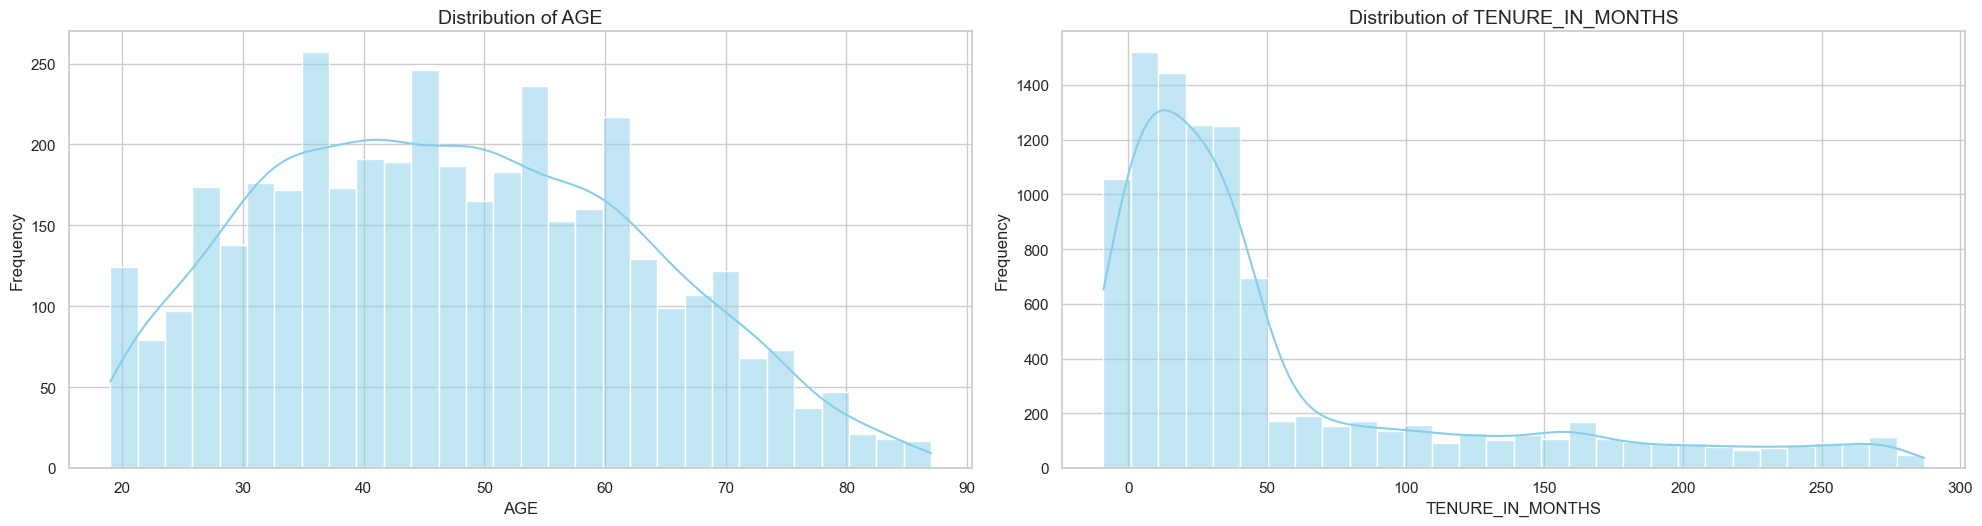

In [34]:

# Load the dataset

data_df = pd.read_excel("C:/Users/91738/Downloads/DS_Python_Assignment.xlsx", sheet_name='Data')

# Setting a general style for the plots
sns.set(style="whitegrid")

# Function to create plots for the selected columns
def plot_distributions(data, columns):
    plt.figure(figsize=(20, 15))

    for i, col in enumerate(columns, start=1):
        plt.subplot(3, 2, i)
        
        if data[col].dtype in ['int64', 'float64']:
            # Numeric columns - Histogram
            sns.histplot(data[col].dropna(), kde=True, bins=30, color='skyblue')
            plt.title(f'Distribution of {col}', fontsize=14)
            plt.xlabel(col)
        else:
            # Categorical columns - Bar plot
            sns.countplot(x=col, data=data, palette='viridis', order=data[col].value_counts().index)
            plt.title(f'Counts of {col}', fontsize=14)
            plt.xlabel(col)
            plt.xticks(rotation=45, ha='right')

        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Initial 6 columns selected for visualization
columns_to_plot = ['AGE','TENURE_IN_MONTHS']
plot_distributions(data_df, columns_to_plot)

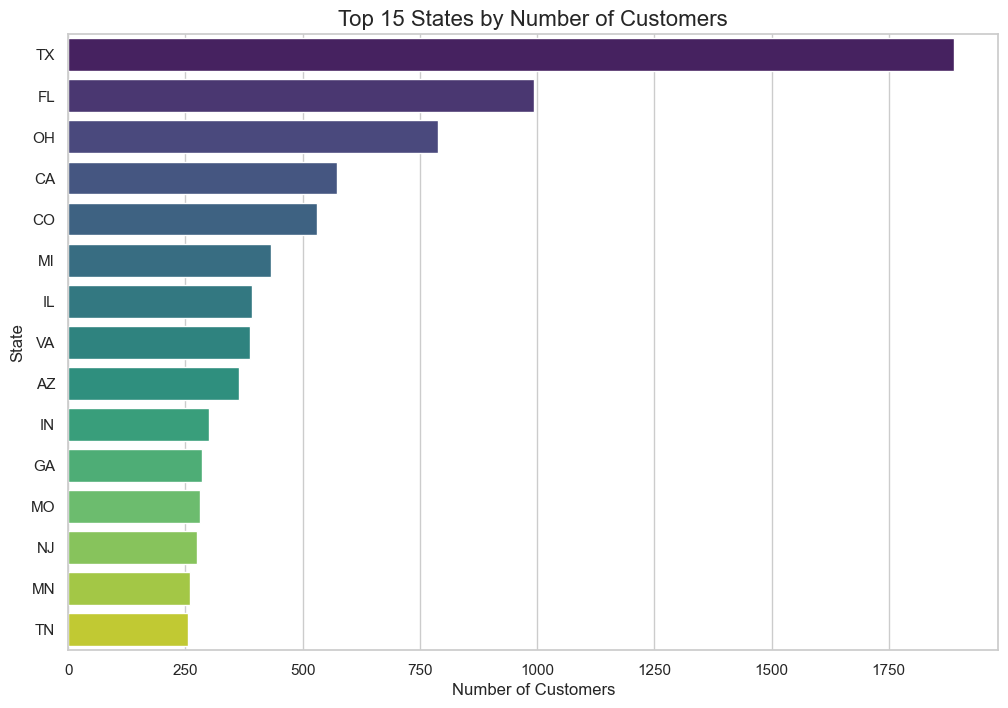

In [29]:
# Load the dataset
file_path = "C:/Users/91738/Downloads/DS_Python_Assignment.xlsx"  # Update the path as necessary
data_df = pd.read_excel(file_path, sheet_name='Data')

# Setting a general style for the plots
sns.set(style="whitegrid")

# Handle missing or invalid values in the STATE column
if 'STATE' in data_df.columns:
    # Drop rows with missing states and count top 15
    state_counts = data_df['STATE'].dropna().value_counts().head(15)

    # Plot the horizontal bar chart
    plt.figure(figsize=(12, 8))
    sns.barplot(y=state_counts.index, x=state_counts.values, palette="viridis")
    plt.title('Top 15 States by Number of Customers', fontsize=16)
    plt.xlabel('Number of Customers', fontsize=12)
    plt.ylabel('State', fontsize=12)
    plt.show()
else:
    print("The 'STATE' column is not available in the dataset.")

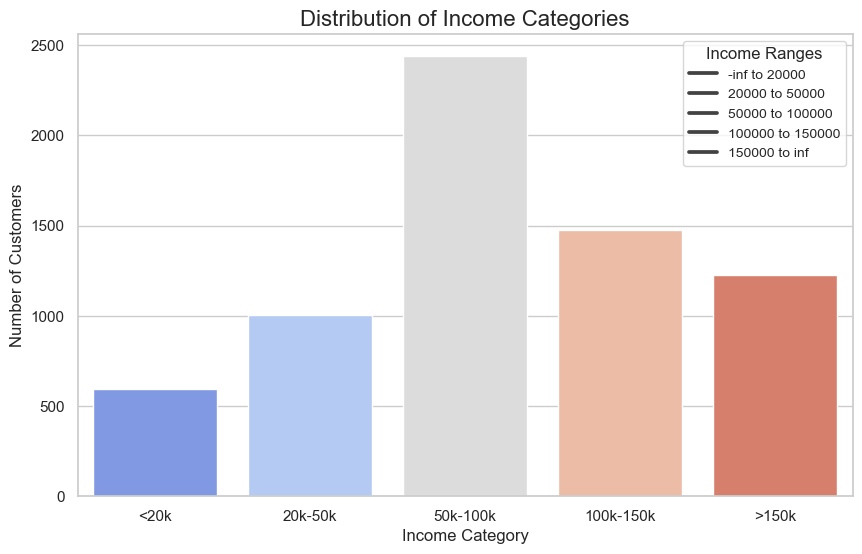

In [33]:
sns.set(style="whitegrid")

# Define income bins and labels
income_bins = [-float('inf'), 20000, 50000, 100000, 150000, float('inf')]
income_labels = ['<20k', '20k-50k', '50k-100k', '100k-150k', '>150k']

# Categorize the INCOME column
data_df['Income Category'] = pd.cut(data_df['INCOME'], bins=income_bins, labels=income_labels)

# Count the number of occurrences in each income category
income_counts = data_df['Income Category'].value_counts(sort=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=income_counts.index, y=income_counts.values, palette="coolwarm")
plt.title('Distribution of Income Categories', fontsize=16)
plt.xlabel('Income Category', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add a legend to explain the categories
plt.legend(
    title='Income Ranges',
    labels=[f'{income_bins[i]} to {income_bins[i + 1]}' for i in range(len(income_bins) - 1)],
    loc='upper right',
    fontsize=10,
)

plt.show()

In [31]:
# Count the number of values in the INCOME column less than 0
negative_income_count = (data_df['INCOME'] < 0).sum()
print(f"Number of values in INCOME less than 0: {negative_income_count}")

Number of values in INCOME less than 0: 0


<Axes: xlabel='AGE', ylabel='TENURE_IN_MONTHS'>

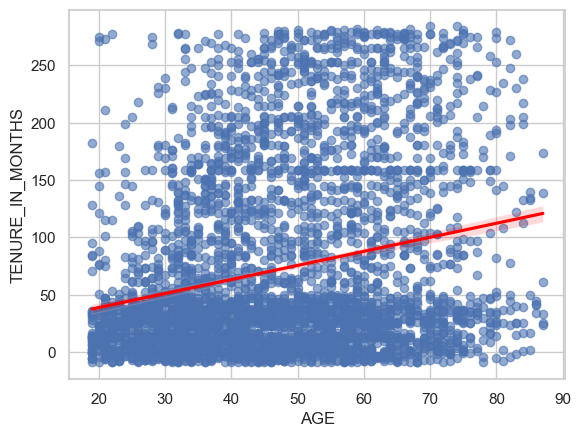

In [52]:
sns.regplot(data=df, x="AGE", y="TENURE_IN_MONTHS", scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})


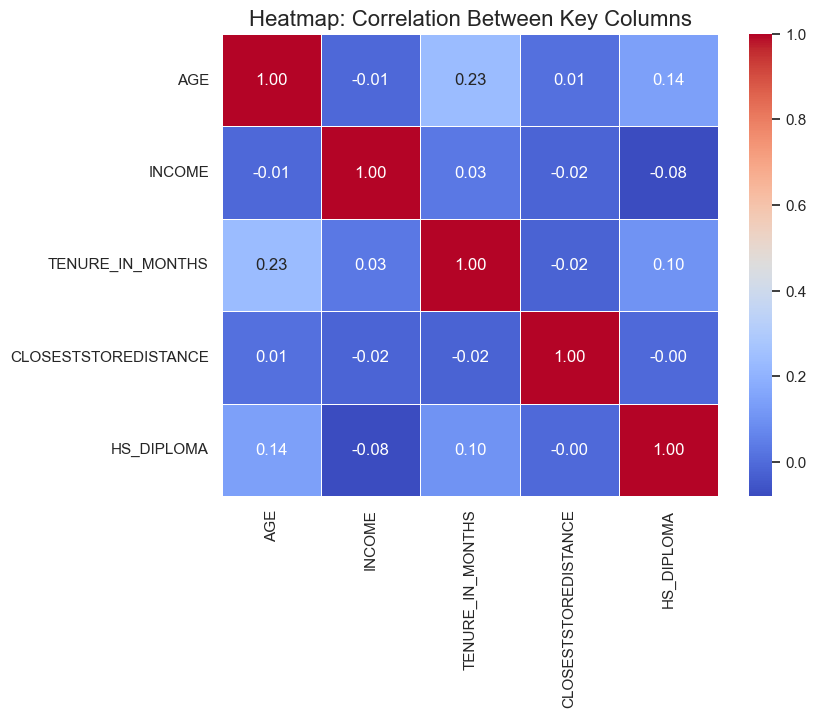

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the most prominent numeric columns
important_columns = ['AGE', 'INCOME', 'TENURE_IN_MONTHS', 'CLOSESTSTOREDISTANCE', 'HS_DIPLOMA']

# Filter the dataset for the selected columns
filtered_df = df[important_columns]

# Calculate correlation matrix
correlation_matrix = filtered_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap: Correlation Between Key Columns", fontsize=16)
plt.show()


In [58]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Find the pairs of columns with the highest correlations (excluding self-correlations)
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
high_correlation_pairs = correlation_pairs[correlation_pairs < 1].drop_duplicates()

# Display the top correlations
print("Most correlated pairs:")
print(high_correlation_pairs.head(10))


Most correlated pairs:
MOR BANK: DEDUPED CATEGORY HIT COUNT  MOR BANK: NON-DEDUPED CATEGORY HIT COUNT    0.980826
MDAYQTY_L2Y                           MDAYREV_L2Y                                 0.960818
CAPE: EDUC: ISPSA                     CAPE: EDUC: ISPSA DECILE                    0.950058
CAPE: LANG: HH: % SPANISH SPEAKING    CAPE: ETHNIC: POP: % HISPANIC               0.944917
NUMBER OF PERSONS IN LIVING UNIT      NUMBER OF ADULTS IN LIVING UNIT             0.905520
CAPE: CHILD: HH: % WITH PERSONS LT18  CAPE: HHSIZE: HH: AVERAGE HOUSEHOLD SIZE    0.895243
MDAYSHOPPER_L2Y                       MDAYQTY_L2Y                                 0.891078
CAPE: AGE: POP: % 65-99+              CAPE: AGE: POP: MEDIAN AGE                  0.884998
MDAYSHOPPER_L4Y                       MDAYQTY_L4Y                                 0.874288
CAPE: CHILD: HH: % WITH PERSONS LT18  CAPE: AGE: POP: % 0-17                      0.873395
dtype: float64


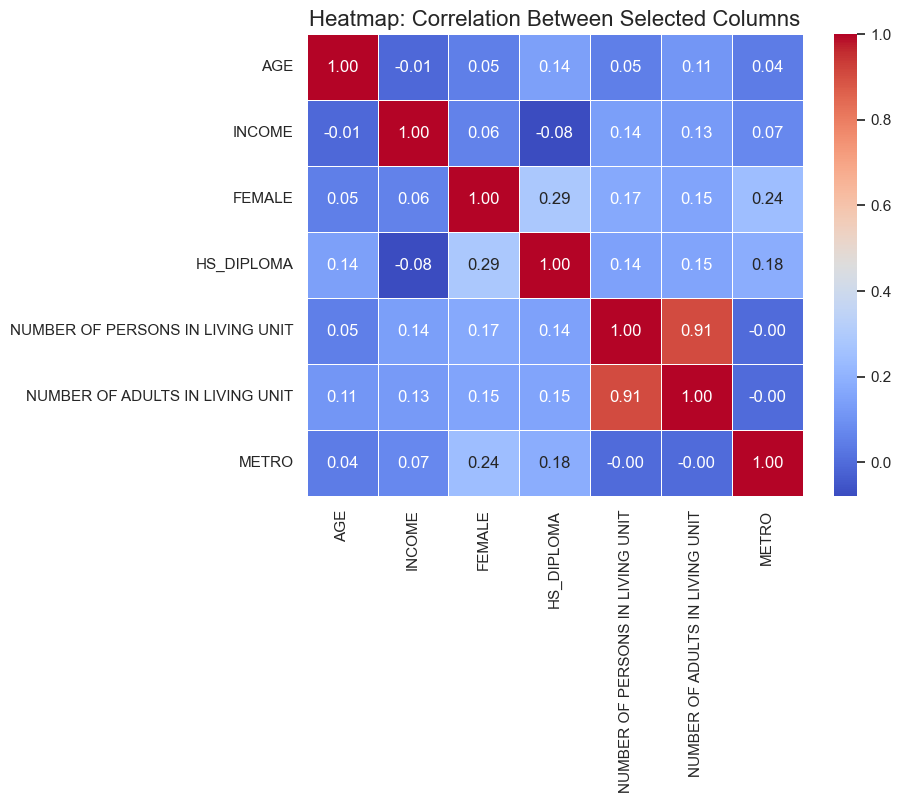

In [59]:
# Select the columns to be analyzed
columns_to_consider = [
    'AGE', 
    'INCOME', 
    'FEMALE', 
    'HS_DIPLOMA', 
    'NUMBER OF PERSONS IN LIVING UNIT', 
    'NUMBER OF ADULTS IN LIVING UNIT', 
    'METRO'
]

# Filter the dataset for the selected columns
filtered_df = df[columns_to_consider]

# Calculate correlation matrix
correlation_matrix = filtered_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap: Correlation Between Selected Columns", fontsize=16)
plt.show()


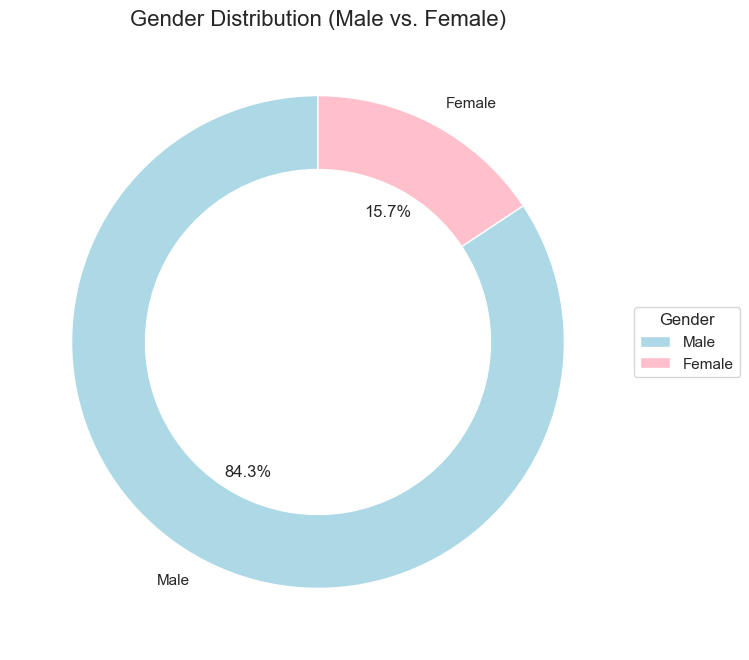

In [60]:
#Count the values in the FEMALE column
gender_counts = df['FEMALE'].value_counts()

# Labels for the chart
labels = ['Male', 'Female']  # Corresponding to 0 and 1 in the FEMALE column

# Plot the donut chart
plt.figure(figsize=(8, 8))
plt.pie(
    gender_counts, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['lightblue', 'pink'], 
    wedgeprops={'width': 0.3}
)

# Add a title
plt.title("Gender Distribution (Male vs. Female)", fontsize=16)

# Add a legend
plt.legend(labels, title="Gender", loc="center left", bbox_to_anchor=(1, 0.5))

# Show the chart
plt.show()


In [65]:
pip install nbconvert

In [ ]:
!pip install 